In [1]:
import pandas as pd

#读取数据
df_news = pd.read_table('E:\\machineLearning\\kaggle\\dataset\\news_data.txt', 
                        names=['category', 'theme', 'URL', 'content'], encoding='utf-8')
df_news = df_news.dropna()
df_news.head()

,category,theme,URL,content
0,汽车,新辉腾 ４．２ Ｖ８ ４座加长Ｉｎｄｉｖｉｄｕａｌ版２０１１款 最新报价,http://auto.data.people.com.cn/model_15782/,经销商 电话 试驾／订车Ｕ憬杭州滨江区江陵路１７８０号４００８－１１２２３３转５８６４＃保常...
1,汽车,９１８ Ｓｐｙｄｅｒ概念车,http://auto.data.people.com.cn/prdview_165423....,呼叫热线 ４００８－１００－３００ 服务邮箱 ｋｆ＠ｐｅｏｐｌｅｄａｉｌｙ．ｃｏｍ．ｃｎ
2,汽车,日内瓦亮相 ＭＩＮＩ性能版／概念车－１．６Ｔ引擎,http://auto.data.people.com.cn/news/story_5249...,ＭＩＮＩ品牌在二月曾经公布了最新的ＭＩＮＩ新概念车Ｃｌｕｂｖａｎ效果图，不过现在在日内瓦车展...
3,汽车,清仓大甩卖一汽夏利Ｎ５威志Ｖ２低至３．３９万,http://auto.data.people.com.cn/news/story_6144...,清仓大甩卖！一汽夏利Ｎ５、威志Ｖ２低至３．３９万＝日，启新中国一汽强势推出一汽夏利Ｎ５、威志...
4,汽车,大众敞篷家族新成员 高尔夫敞篷版实拍,http://auto.data.people.com.cn/news/story_5686...,在今年３月的日内瓦车展上，我们见到了高尔夫家族的新成员，高尔夫敞篷版，这款全新敞篷车受到了众...


In [2]:
#数据清洗
content = df_news.content.values.tolist()
print(content[100])

经销商　电话　试驾／订车３鄙锹罚叮购沤鹌焦ひ登对面＃矗埃埃福１１２２３３转９４２６＃矗３９万Ｎ浜菏形洳区友谊大道特一号（武昌交警大队旁）＃矗埃埃福１１２２３３转７５１２＃矗４９万：？谑心虾４蟮溃保矗焙牛积＃矗埃埃福１１２２３３转９１１９＃矗５９万Ｉ蕉省临沂市沂河路与罗七路交汇处向西路南１００米远通汽车广场院内＃矗５９万Ｌ原市小店区太榆路３号４．１９万Ｌ旖蚴泻游髑解放南路６１３号三期五号＃矗３９万Ｆ蕉仁形魍饣烦ぐ蚕售基地＃矗３９万


In [3]:
import jieba as jb

#对文章进行分词
content_S = []
for line in content:
    current_segment = jb.lcut(line)
    if len(current_segment) > 1 and current_segment != '\r\n':
        content_S.append(current_segment)
#展示分词结果
df_content = pd.DataFrame({'content_S':content_S})
df_content.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\wangyan\AppData\Local\Temp\jieba.cache
Loading model cost 0.349 seconds.
Prefix dict has been built successfully.


,content_S
0,"[经销商, , 电话, , 试驾, ／, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, ..."
1,"[呼叫, 热线, , ４, ０, ０, ８, －, １, ０, ０, －, ３, ０, ０..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 在, 二月, 曾经, 公布, 了, 最新, 的, Ｍ, Ｉ..."
3,"[清仓, 大, 甩卖, ！, 一汽, 夏利, Ｎ, ５, 、, 威志, Ｖ, ２, 低至, ..."
4,"[在, 今年, ３, 月, 的, 日内瓦, 车展, 上, ，, 我们, 见到, 了, 高尔夫..."


In [4]:
#加载停用词
stopwords=pd.read_csv("E:\\machineLearning\\kaggle\\dataset\\stopwords.txt",
                      index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8')
stopwords.head(10)

,stopword
0,!
1,""""
2,#
3,$
4,%
5,&
6,'
7,(
8,)
9,*


In [5]:
#构造停用词过滤函数
def drop_stopwords(contents, stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean, all_words
contents = df_content.content_S.values.tolist()
stopwords = stopwords.stopword.values.tolist()
contents_clean, all_words = drop_stopwords(contents, stopwords)
df_content=pd.DataFrame({'contents_clean':contents_clean}) # 分词后的清洗结果
df_all_words=pd.DataFrame({'all_words': all_words}) #分词后的清洗结果单个数据保存
df_content.tail()

,contents_clean
4995,"[天气, 炎热, 补水, 变得, 美国, 跑步, 世界, 杂志, 报道, 喝水, 身体, 补..."
4996,"[不想, 说, 话, 刺激, 说, 做, 只能, 走, 离开, 伤心地, 想起, 一句, 话..."
4997,"[岁, 刘晓庆, 最新, 嫩照, Ｏ, 衷, 诘, 牧跸, 庆, 看不出, 岁, 秒杀, 刘..."
4998,"[导语, 做, 爸爸, 一种, 幸福, 无论是, 领养, 亲生, 更何况, 影视剧, 中, ..."
4999,"[全球, 最美, 女人, 合成图, 国, 整形外科, 教授, 李承哲, 国际, 学术, 杂志..."


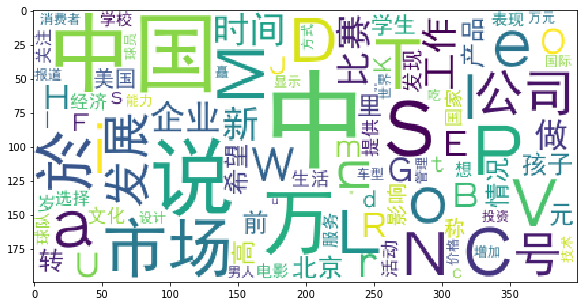

In [6]:
#绘制词云图
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
woordcloud_data = df_all_words.all_words.value_counts()[:100] #截取要呈现的目标数据
wordcloud = WordCloud(font_path="E:\\machineLearning\\kaggle\\projectResult\\simhei.ttf",
                    background_color="white", max_font_size=80) #初始化
wordcloud = wordcloud.fit_words(woordcloud_data)
plt.imshow(wordcloud)

In [7]:
#TF-IDF关键词提取
import jieba.analyse

index = 2400
content_S_str = "".join(content_S[index]) #分词结果组合在一起，形成一个句子
print (content_S_str)
print ("  ".join(jieba.analyse.extract_tags(content_S_str, topK=5, withWeight=False))) #选出来5个核心词

法国ＶＳ西班牙、里贝里ＶＳ哈维，北京时间６月２４日凌晨一场的大战举世瞩目，而这场胜利不仅仅关乎两支顶级强队的命运，同时也是他们背后的球衣赞助商耐克和阿迪达斯之间的一次角逐。Ｔ谌胙”窘炫分薇的１６支球队之中，阿迪达斯和耐克的势力范围也是几乎旗鼓相当：其中有５家球衣由耐克提供，而阿迪达斯则赞助了６家，此外茵宝有３家，而剩下的两家则由彪马赞助。而当比赛进行到现在，率先挺进四强的两支球队分别被耐克支持的葡萄牙和阿迪达斯支持的德国占据，而由于最后一场１／４决赛是茵宝（英格兰）和彪马（意大利）的对决，这也意味着明天凌晨西班牙同法国这场阿迪达斯和耐克在１／４决赛的唯一一次直接交手将直接决定两家体育巨头在此次欧洲杯上的胜负。８据评估，在２０１２年足球商品的销售额能总共超过４０亿欧元，而单单是不足一个月的欧洲杯就有高达５亿的销售额，也就是说在欧洲杯期间将有７００万件球衣被抢购一空。根据市场评估，两大巨头阿迪达斯和耐克的市场占有率也是并驾齐驱，其中前者占据３８％，而后者占据３６％。体育权利顾问奥利弗－米歇尔在接受《队报》采访时说：“欧洲杯是耐克通过法国翻身的一个绝佳机会！”Ｃ仔尔接着谈到两大赞助商的经营策略：“竞技体育的成功会燃起球衣购买的热情，不过即便是水平相当，不同国家之间的欧洲杯效应却存在不同。在德国就很出色，大约１／４的德国人通过电视观看了比赛，而在西班牙效果则差很多，由于民族主义高涨的加泰罗尼亚地区只关注巴萨和巴萨的球衣，他们对西班牙国家队根本没什么兴趣。”因此尽管西班牙接连拿下欧洲杯和世界杯，但是阿迪达斯只为西班牙足协支付每年２６００万的赞助费＃相比之下尽管最近两届大赛表现糟糕法国足协将从耐克手中每年可以得到４０００万欧元。米歇尔解释道：“法国创纪录的４０００万欧元赞助费得益于阿迪达斯和耐克竞逐未来１５年欧洲市场的竞争。耐克需要笼络一个大国来打赢这场欧洲大陆的战争，而尽管德国拿到的赞助费并不太高，但是他们却显然牢牢掌握在民族品牌阿迪达斯手中。从长期投资来看，耐克给法国的赞助并不算过高。”
耐克  阿迪达斯  欧洲杯  球衣  西班牙


In [8]:
#词袋模型
#标签及映射关系
df_train = pd.DataFrame({'contents_clean': contents_clean, 'label': df_news['category']})
df_train.tail()

,contents_clean,label
4995,"[天气, 炎热, 补水, 变得, 美国, 跑步, 世界, 杂志, 报道, 喝水, 身体, 补...",时尚
4996,"[不想, 说, 话, 刺激, 说, 做, 只能, 走, 离开, 伤心地, 想起, 一句, 话...",时尚
4997,"[岁, 刘晓庆, 最新, 嫩照, Ｏ, 衷, 诘, 牧跸, 庆, 看不出, 岁, 秒杀, 刘...",时尚
4998,"[导语, 做, 爸爸, 一种, 幸福, 无论是, 领养, 亲生, 更何况, 影视剧, 中, ...",时尚
4999,"[全球, 最美, 女人, 合成图, 国, 整形外科, 教授, 李承哲, 国际, 学术, 杂志...",时尚


In [9]:
#df_train.label.unique() 查看总共有多少个唯一的标签，然后在进行映射
label_mapping = {"汽车": 1, "财经": 2, "科技": 3, "健康": 4, "体育": 5, "教育": 6, "文化": 7, "军事": 8, "娱乐": 9, "时尚": 0}
df_train['label'] = df_train['label'].map(label_mapping) #构建一个映射方法
df_train.tail()

,contents_clean,label
4995,"[天气, 炎热, 补水, 变得, 美国, 跑步, 世界, 杂志, 报道, 喝水, 身体, 补...",0
4996,"[不想, 说, 话, 刺激, 说, 做, 只能, 走, 离开, 伤心地, 想起, 一句, 话...",0
4997,"[岁, 刘晓庆, 最新, 嫩照, Ｏ, 衷, 诘, 牧跸, 庆, 看不出, 岁, 秒杀, 刘...",0
4998,"[导语, 做, 爸爸, 一种, 幸福, 无论是, 领养, 亲生, 更何况, 影视剧, 中, ...",0
4999,"[全球, 最美, 女人, 合成图, 国, 整形外科, 教授, 李承哲, 国际, 学术, 杂志...",0


In [11]:
#数据集切分
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train['contents_clean'].values,
                                                    df_train['label'].values, random_state=1)
words = []
#训练集数据格式转换
for line_index in range(len(x_train)):
    try:
        words.append(' '.join(x_train[line_index]))
    except:
        print()
test_words = []
#测试集数据格式转换
for line_index in range(len(x_test)):
    try:
        test_words.append(' '.join(x_test[line_index]))
    except:
         print()

In [13]:
#建模
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(analyzer='word', max_features=4000, lowercase=False)
feature = vec.fit_transform(words)
print(feature.shape)

(3750, 4000)


In [14]:
#贝叶斯模型
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(feature, y_train)
classifier.score(vec.transform(test_words), y_test)

0.804

In [16]:
#TF-IDF特征
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vectorizer.fit(words)
classifier = MultinomialNB()
classifier.fit(vectorizer.transform(words), y_train)
classifier.score(vectorizer.transform(test_words), y_test)

0.8152